In [16]:
import pandas as pd
iris = pd.read_csv('Iris.csv')
iris = iris.drop(columns=['Id', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
iris

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


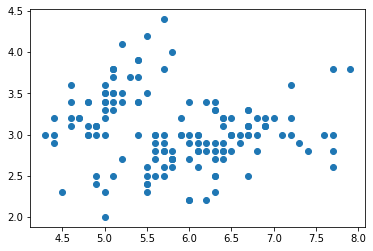

In [17]:
import matplotlib.pyplot as plt
plt.scatter(iris.SepalLengthCm, iris.SepalWidthCm)
plt.show()


In [18]:
import numpy as np
def dataset_to_numpy(dataset):
    data = dataset.to_numpy()
    return data

In [19]:
#TEST
df = dataset_to_numpy(iris)
df

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [20]:
def get_clusters(dataset, centroids):
    dataset = dataset_to_numpy(dataset)
    distances = []
    clusters = []
    for datapoint in dataset:
        for centroid in centroids:
            distances.append(np.linalg.norm(datapoint-centroid))
        clusters.append(centroids.index(centroids[distances.index(min(distances))]))
        distances.clear()
    return clusters  

In [21]:
#TEST
clusters = get_clusters(iris, initial_centroids(iris, 4))
print(clusters)

[2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3, 1, 2, 2, 3, 3, 1, 3, 3, 1, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
def initial_centroids(dataset, k):
    dataset = dataset_to_numpy(dataset)
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]
    centroids = centroids.tolist()
    return centroids     

In [23]:
#TEST
centroids = initial_centroids(iris, 4)
centroids

[[5.8, 2.7], [6.2, 2.2], [5.4, 3.4], [6.1, 2.8]]

In [24]:
def get_centroids(dataset, old_clusters, k):
    dataset = dataset_to_numpy(dataset).tolist()
    new_clusters = {}
    new_centroids = []
    for i in range(k):
        new_clusters[i] = []
    for i, cluster in enumerate(old_clusters):
        new_clusters[cluster].append(dataset[i])
    for i in range(k):
        coordinate = []
        sum_x = 0
        sum_y = 0
        for coord in new_clusters.get(i):
            sum_x += coord[0]
            sum_y += coord[1]
        #edge case = len(new_clusters.get(i)) is 0
        if(len(new_clusters.get(i))) != 0 :
            coordinate.append(sum_x/len(new_clusters.get(i)))
            coordinate.append(sum_y/len(new_clusters.get(i)))
            new_centroids.append(coordinate)
        else:
            new_centroids.append([0,0])
    return new_centroids

In [25]:
collect = get_centroids(iris, get_clusters(iris,initial_centroids(iris,4)), 4)
collect

[[4.569230769230769, 3.1461538461538465],
 [5.148837209302326, 3.3813953488372093],
 [6.461904761904763, 2.533333333333333],
 [6.301369863013695, 2.9945205479452057]]

In [26]:
def clusters_changed(old_clusters, new_clusters):
    return old_clusters == new_clusters

In [27]:
old = get_clusters(iris, initial_centroids(iris,3))
new = get_clusters(iris, get_centroids(iris, get_clusters(iris,initial_centroids(iris,4)), 4))
clusters_changed(old, new)

False

In [28]:
def k_means_algorithm(dataset, k):
    dataset = dataset.iloc[:,[0,1]]
    new_centroids = initial_centroids(dataset,k)
    no_change = False
    while not no_change:
        old_centroids = new_centroids
        clusters = get_clusters(dataset, old_centroids)
        new_centroids = get_centroids(dataset, clusters, k)
        no_change = clusters_changed(clusters, get_clusters(dataset, new_centroids))
    new_dataset = dataset.copy(deep = True)
    new_dataset.insert(2, "Clusters", get_clusters(dataset, new_centroids))
    return new_dataset

In [29]:
k_means_algorithm(iris, 3)

,SepalLengthCm,SepalWidthCm,Clusters
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,2
147,6.5,3.0,0
148,6.2,3.4,0


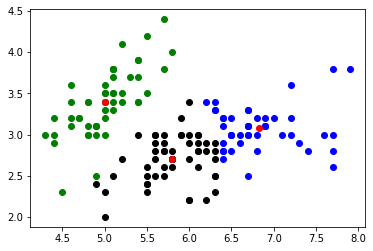

In [30]:
data = k_means_algorithm(iris,3)
c1 = data[data.Clusters==0]
c2 = data[data.Clusters==1]
c3 = data[data.Clusters==2]
plt.scatter(c1.SepalLengthCm, c1.SepalWidthCm, color = "blue")
plt.scatter(c2.SepalLengthCm, c2.SepalWidthCm, color = "green")
plt.scatter(c3.SepalLengthCm, c3.SepalWidthCm, color = "black")
x, y = np.array((get_centroids(iris, data.Clusters, 3))).T
plt.scatter(x,y, c = 'red')


In [31]:
crime_map = pd.read_csv('Crime Map.csv')
crime_map = crime_map.drop(columns=['city_key', 'incident_code', 'incident_date', 'incident_address', 'incident_offense_code', 'incident_offense', 'incident_offense_description', 'incident_offense_detail_description', 'incident_offense_action'])
burglaries = crime_map[crime_map['incident_source_original_type'].str.contains('Burglary')]
locations = burglaries.drop(columns=['city_name','incident_offense_crime_against'])
locations


,incident_latitude,incident_longitude,incident_source_original_type
3,37.781160,-122.461063,Burglary - Commercial
10,37.793050,-122.422871,Burglary - Other
12,37.793050,-122.422871,Burglary - Other
22,37.779829,-122.402841,Burglary - Other
24,37.778946,-122.467354,Burglary - Residential
...,...,...,...
2198,37.775950,-122.422788,Burglary - Other
2217,37.739978,-122.437495,Burglary - Residential
2218,37.739978,-122.437495,Burglary - Residential
2231,37.764188,-122.446074,Burglary - Residential


[[  37.76323444 -122.46500588]
 [  37.78491904 -122.42255899]
 [  37.73995103 -122.41353863]]


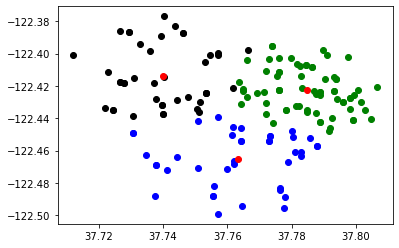

In [32]:
data = k_means_algorithm(locations,3)
c1 = data[data.Clusters==0]
c2 = data[data.Clusters==1]
c3 = data[data.Clusters==2]
plt.scatter(c1.incident_latitude, c1.incident_longitude, color = "blue")
plt.scatter(c2.incident_latitude, c2.incident_longitude, color = "green")
plt.scatter(c3.incident_latitude, c3.incident_longitude, color = "black")
x, y = np.array((get_centroids(locations, data.Clusters, 3))).T
plt.scatter(x,y, c = 'red')
print( np.array((get_centroids(locations, data.Clusters, 3))))

In [33]:
np.random.seed(2)
x = np.random.normal(3, 1, 100)
print("X:",x)
y = np.random.normal(150, 40, 100) / x
print("Y:",y)

X: [2.58324215 2.94373317 0.8638039  4.64027081 1.20656441 2.15825263
 3.50288142 1.75471191 1.94204778 2.09099239 3.55145404 5.29220801
 3.04153939 1.88207455 3.53905832 2.4038403  2.9808695  4.17500122
 2.25212905 3.00902525 2.12189211 2.84356583 3.25657045 2.01122095
 2.66117803 2.76381597 2.36234499 1.81238771 1.57878277 2.8465048
 2.73094304 5.23136679 0.56523242 3.1127265  3.37044454 4.35963386
 3.50185721 2.1557863  3.00000976 3.54235257 2.6864918  3.77101174
 1.13190935 4.73118467 4.46767801 2.66432266 3.61134078 3.04797059
 2.17086471 3.08771022 4.00036589 2.61890748 2.62433058 2.92552924
 3.43349633 4.27837923 2.36532069 3.50839624 3.21611601 1.14138761
 2.58068352 2.8676711  2.96042976 3.32600343 0.95967695 3.04625552
 2.32232442 1.56056097 3.52429643 3.73527958 2.34674973 3.84245628
 2.61848352 3.06648901 1.90126105 4.58448706 0.34055054 2.90854738
 3.69511961 0.96653345 2.81053074 2.92278133 3.82470301 4.24821292
 2.59610773 1.61548133 4.36723542 4.21788563 2.53799465 3.35

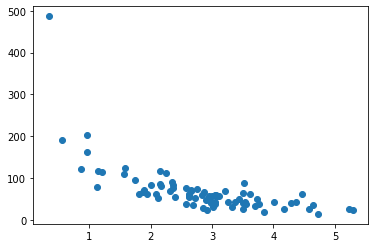

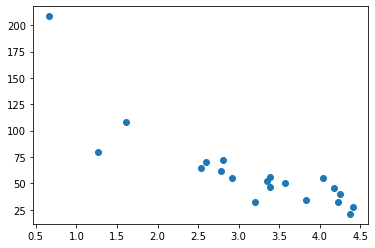

In [34]:
train_x = x[:80]
train_y = y[:80]
plt.scatter(train_x, train_y)
plt.show()
test_x = x[80:]
test_y = y[80:]
plt.scatter(test_x, test_y)
plt.show()

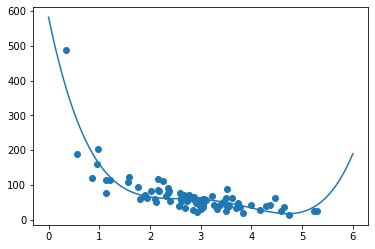

In [35]:
mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()